<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/voting_and_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()



In [7]:
df['species']=encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


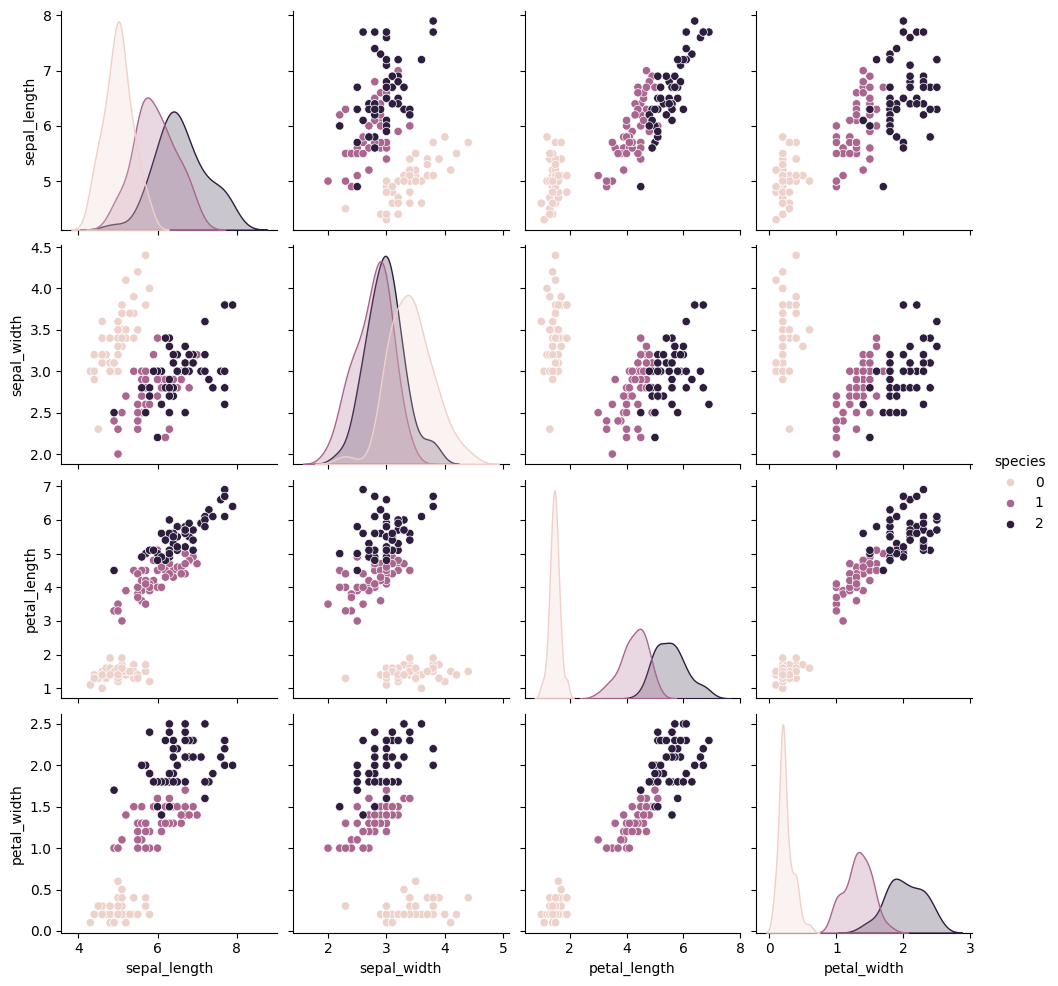

In [8]:
import seaborn as sns
sns.pairplot(df,hue='species')

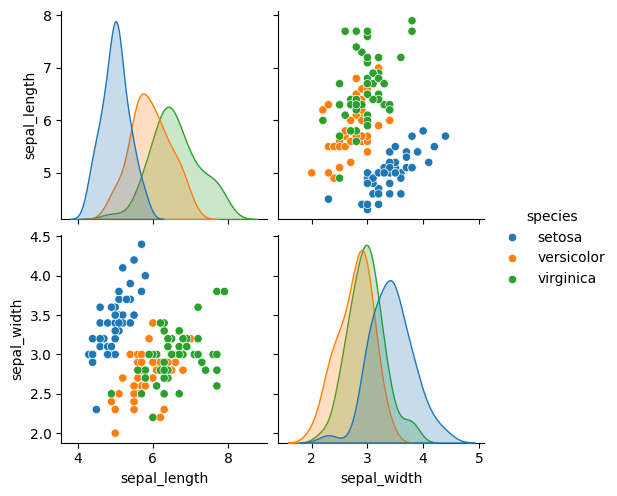

In [9]:
import seaborn as sns
import pandas as pd

# Load the iris dataset
df = sns.load_dataset('iris')

# Select only 'sepal_length' and 'sepal_width' columns with 'species'
new_df = df[['sepal_length', 'sepal_width', 'species']]

# Optional: remove any rows where species is 0 (not necessary for this dataset, but included per your original code)
new_df = new_df[new_df['species'] != 0]

# Plot pairplot with only selected columns
sns.pairplot(new_df, hue='species')


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [11]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [12]:
estimators=[('Lr',clf1),('rf',clf2),('knn',clf3)]
for estimator in estimators:
  x=cross_val_score(estimator[1],df.iloc[:,:-1],df.iloc[:,-1],cv=10)
  print(estimator[0],np.round(np.mean(x),2))



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lr 0.97
rf 0.96
knn 0.97


In [13]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc,df.iloc[:,:-1],df.iloc[:,-1],cv=10)
print(np.round(np.mean(x),2))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.97


bagging or pasting regressor


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [17]:
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df=df[df['species']!=0][['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


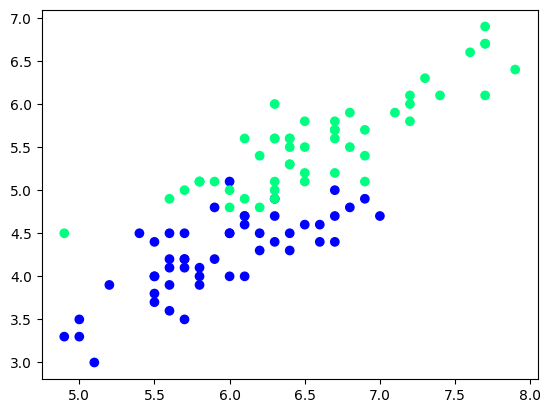

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['sepal_length'],df['petal_length'],c=df['species'],cmap='winter')


In [35]:
df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [36]:
df_train

,sepal_length,petal_length,species
98,5.1,3.0,1
57,4.9,3.3,1
77,6.7,5.0,1
68,6.2,4.5,1
93,5.0,3.3,1
69,5.6,3.9,1
61,5.9,4.2,1
94,5.6,4.2,1
83,6.0,5.1,1
75,6.6,4.4,1


In [37]:
df_val

,sepal_length,petal_length,species
122,7.7,6.7,2
114,5.8,5.1,2
116,6.5,5.5,2
119,6.0,5.0,2
123,6.3,4.9,2


In [42]:
from collections.abc import ValuesView
x_test=df_val.iloc[:,0:2].values
y_test = df_val.iloc[:, -1].values


array([[7.7, 6.7],
       [5.8, 5.1],
       [6.5, 5.5],
       [6. , 5. ],
       [6.3, 4.9]])

In [45]:
df_bAag=df_train.sample(8,replace=True)
x=df_bAag.iloc[:,0:2]
y=df_bAag.iloc[:,-1]
df_bAag

,sepal_length,petal_length,species
93,5.0,3.3,1
68,6.2,4.5,1
94,5.6,4.2,1
83,6.0,5.1,1
93,5.0,3.3,1
69,5.6,3.9,1
93,5.0,3.3,1
83,6.0,5.1,1


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions



In [58]:
dt_bag1=DecisionTreeClassifier()

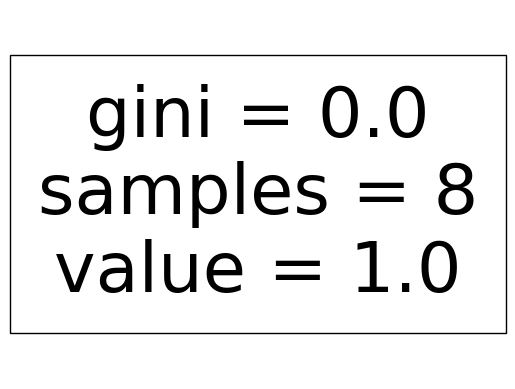

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


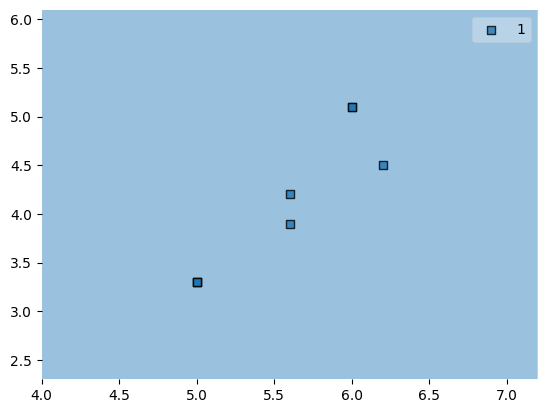

0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [65]:
evalaute(dt_bag1,x,y)


In [69]:
df_bAag=df_train.sample(8,replace=True)
a=df_bAag.iloc[:,0:2]
b=df_bAag.iloc[:,-1]
df_bAag

,sepal_length,petal_length,species
93,5.0,3.3,1
98,5.1,3.0,1
93,5.0,3.3,1
98,5.1,3.0,1
69,5.6,3.9,1
61,5.9,4.2,1
83,6.0,5.1,1
75,6.6,4.4,1


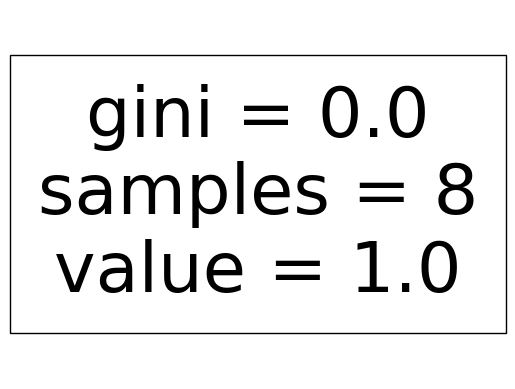

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


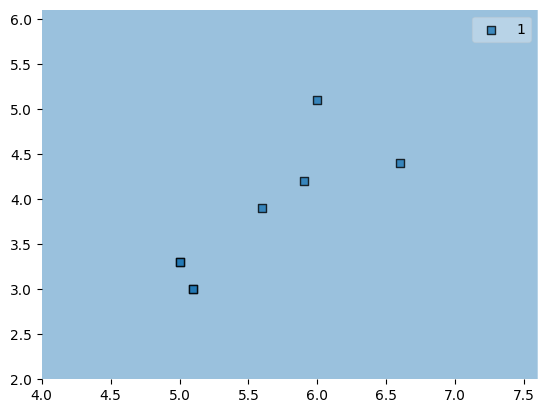

0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [70]:
dt_bag2=DecisionTreeClassifier()
evalaute(dt_bag2,a,b)

In [68]:
from mlxtend.plotting import plot_decision_regions

def evalaute(clf,x,y):
  clf.fit(x,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(x.values,y.values,clf)
  plt.show()
  y_pred=dt_bag1.predict(x_test)
  print(accuracy_score(y_test,y_pred))
